In [1]:
%load_ext autoreload

In [19]:
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.ops import cascaded_union
from descartes import PolygonPatch, patch
from operator import sub
from sklearn.preprocessing import minmax_scale
from matplotlib.collections import PatchCollection
from sklearn.utils import shuffle
from filter_utils import *

np.seterr(invalid='raise')

data_path = '../data/binary_data/RESULTS_EUROVIS2015.csv'
folder_path = "../data/binary_data/EUROVIS_new/"

df = get_data(5, data_path = data_path, folder_path = folder_path)
buff = (max(df.x) - min(df.x)) / (np.sqrt(len(df.x))*2)

print(buff)
df.head()

16.04349197777314


,x,y,class
0,121,559,0
1,126,504,1
2,130,894,0
3,135,738,1
4,135,745,1


In [20]:
ddf = shuffle(df).reset_index(drop=True)
ddf.head()


,x,y,class
0,301,742,1
1,809,649,0
2,329,496,1
3,541,211,0
4,448,411,0


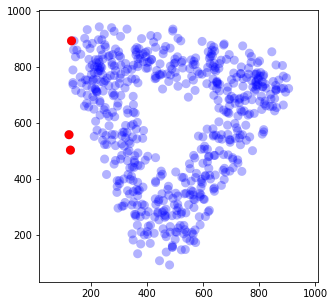

In [21]:
circles = get_circles(df, buff)
f = plt.figure(figsize = (5, 5))
ax=plt.subplot(1,1,1)
plot_occluded_circles(ax, [circles, circles[circles.index<3]], ['blue', 'red'], [0.3, 1])

KeyboardInterrupt: 

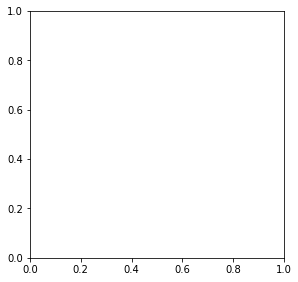

In [17]:
%%time
f = plt.figure(figsize = (10, 10))
ii = 4
m = 1
p = .25

for i in range(ii):
    ax=plt.subplot(ii/2, 2, i+1)
    

    if i == 0 :
        circle_series = get_circles(df, m*buff)
        
    elif i == 1 :
        circle_series = get_circles(ddf, m*buff)
        
    else :
        circle_series = get_circles(shuffle(df), m*buff)
        
    final_circles, rem_indexes = remove_circles(circle_series, p)
    print("Initial Circles: %3d" %(len(circle_series)))
    print('Final Circles: %3d' %(len(final_circles)))
    print('Indexes: {}'.format(rem_indexes))

    if len(rem_indexes)>0:
        plot_series, colors, alphas = get_plotting_order(circle_series, rem_indexes)
        plot_occluded_circles(ax, plot_series, colors, alphas)
        
    if i != 0 :
        ax.title.set_text('Shuffled Data; Removed circles: {}'.format(len(rem_indexes)))
    else:
        ax.title.set_text('Original Order; Removed circles: {}'.format(len(rem_indexes)))
    
f.savefig('data5_method1_{}buff_{}percent.pdf'.format(m, p))

Initial Circles: 597
Final Circles: 492
Indexes: [3, 17, 33, 40, 43, 44, 46, 47, 50, 51, 52, 54, 57, 58, 61, 62, 74, 87, 101, 134, 135, 136, 158, 161, 169, 177, 181, 182, 186, 188, 190, 193, 203, 207, 211, 228, 231, 232, 233, 244, 249, 251, 252, 260, 265, 273, 280, 282, 283, 290, 302, 303, 308, 310, 314, 330, 333, 334, 338, 340, 360, 364, 367, 370, 384, 385, 389, 397, 399, 401, 412, 416, 420, 422, 423, 428, 429, 430, 434, 438, 446, 447, 448, 463, 466, 471, 476, 480, 482, 490, 508, 512, 543, 544, 546, 547, 548, 553, 557, 562, 563, 565, 569, 582, 583]
Initial Circles: 597
Final Circles: 445
Indexes: [5, 6, 8, 9, 10, 14, 16, 20, 21, 23, 26, 27, 33, 34, 35, 36, 39, 41, 42, 45, 48, 50, 55, 56, 57, 58, 59, 60, 62, 64, 66, 67, 68, 72, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 93, 94, 95, 98, 99, 100, 106, 111, 112, 113, 114, 120, 124, 125, 127, 129, 131, 133, 135, 140, 143, 145, 146, 147, 153, 155, 162, 164, 165, 166, 169, 170, 173, 174, 176, 182, 185, 186, 188, 191, 204, 207, 213, 214, 216

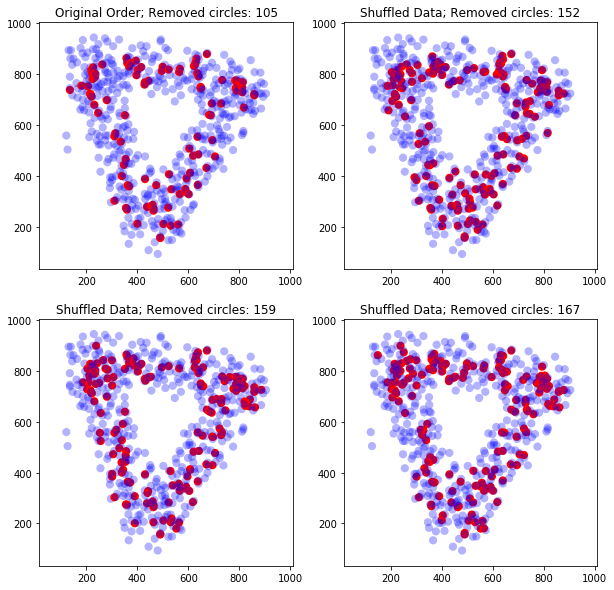

In [18]:
%%time
f = plt.figure(figsize = (10, 10))


for i in range(ii):
    ax=plt.subplot(ii/2, 2, i+1)
    

    if i == 0 :
        circle_series = get_circles(df, m*buff)
        final_circles, rem_indexes = remove_circles_by_partition(df, circle_series, 2*buff, .25)
        
    elif i == 1 :
        circle_series = get_circles(ddf, m*buff)
        final_circles, rem_indexes = remove_circles_by_partition(ddf, circle_series, 2*buff, .25)
        
    else :
        etc = shuffle(df).reset_index(drop=True)
        circle_series = get_circles(etc, m*buff)
        final_circles, rem_indexes = remove_circles_by_partition(etc, circle_series, 2*buff, .25)
        
        
    print("Initial Circles: %3d" %(len(circle_series)))
    print('Final Circles: %3d' %(len(final_circles)))
    print('Indexes: {}'.format(rem_indexes))

    if len(rem_indexes)>0:
        plot_series, colors, alphas = get_plotting_order(circle_series, rem_indexes)
        plot_occluded_circles(ax, plot_series, colors, alphas)
        
    if i != 0 :
        ax.title.set_text('Shuffled Data; Removed circles: {}'.format(len(rem_indexes)))
    else:
        ax.title.set_text('Original Order; Removed circles: {}'.format(len(rem_indexes)))





f.savefig('data5_method2_{}buff_{}percent.pdf'.format(m, p))